# Мещерякова Ксения, 932003

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

### Датасет представляет набор данных изображений, который содержит 15336 сегментов: 3249 сегментов почвы, 7376 сегментов сои, 3520 сегментов травы и 1191 сегментов широколиственных сорняков.

In [2]:
# Гиперпараметры (закомментированные числа - это числа, которые я бы хотела использовать, но у меня не хватает терпения дождаться результатов)
IMG_HEIGHT = IMG_WIDTH = 150
IMG_CHANNEL = 3
EPOCHS = 5 #30
BATCH_SIZE = 60 #16
TRAIN_SAMPLES = 2000 #10625
VAL_SAMPLES = 700
TEST_SAMPLES = 700

In [3]:
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
validation_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'

In [6]:
# Генераторы изображений
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_and_val_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Обучающая, тестовая и валидационная выборки
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = test_and_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

test_generator = test_and_val_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

FileNotFoundError: [WinError 3] Системе не удается найти указанный путь: 'train'

In [64]:
# Модель
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Dropout layer
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Dropout layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [65]:
# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [71]:
# Обучение
history = model.fit(
    train_generator,
    steps_per_epoch=TRAIN_SAMPLES // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=VAL_SAMPLES // BATCH_SIZE)

Epoch 1/5
33/33 [==============================] - 137s 4s/step - loss: 0.3970 - acc: 0.9034 - val_loss: 0.0725 - val_acc: 1.0000
Epoch 2/5
33/33 [==============================] - 124s 4s/step - loss: 0.2634 - acc: 0.9716 - val_loss: 0.0507 - val_acc: 1.0000
Epoch 3/5
33/33 [==============================] - 103s 3s/step - loss: 0.0067 - acc: 1.0000 - val_loss: 0.0040 - val_acc: 1.0000
Epoch 4/5
33/33 [==============================] - 102s 3s/step - loss: 0.0110 - acc: 0.9981 - val_loss: 5.7247 - val_acc: 0.5114
Epoch 5/5
33/33 [==============================] - 94s 3s/step - loss: 0.2223 - acc: 0.9811 - val_loss: 0.0039 - val_acc: 1.0000


In [72]:
# Оценка модели на тестировании
score = model.evaluate(test_generator, steps=TEST_SAMPLES // BATCH_SIZE)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

11/11 [==============================] - 7s 653ms/step - loss: 0.0038 - acc: 1.0000
Test loss: 0.0038330277893692255
Test accuracy: 1.0


Вывод:
* Test loss - это значение функции потерь на тестовом наборе данных. Меньшее значение потерь говорит о том, что модель лучше справляется с задачей, поэтому значение 0.0038 является очень хорошим результатом, предполагая, что распределение тестовых данных аналогично обучающему набору.
* Test accuracy - это точность модели на тестовом наборе. Значение 1.0 означает, что модель правильно классифицировала все примеры в тестовом наборе данных.

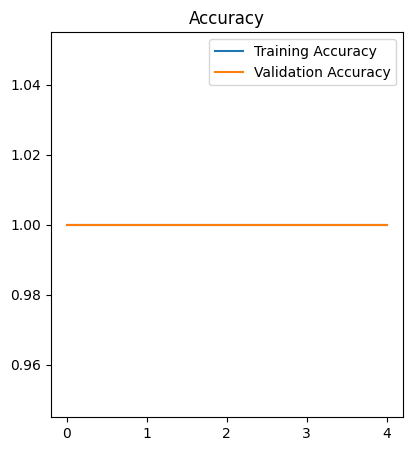

In [84]:
# Создаем график точности
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

Вывод: Данный график отображает изменение точности модели при обучении и валидации во время каждого эпоха обучения. Данный график имеет значение 1, что указывает, что модель достигает идеальной точности как на обучающем, так и на валидационном наборах данных.

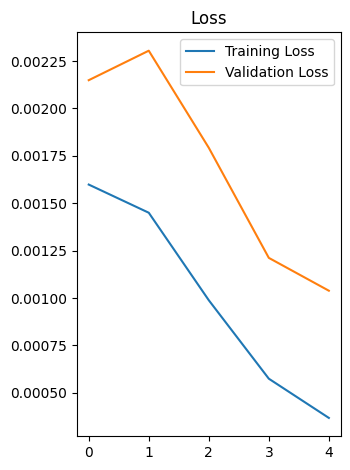

In [85]:
# Создаем график потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Вывод: Training Loss и Validation Loss постепенно уменьшаются, что указывает на то, что модель "учится" и становится способной к лучшему прогнозированию

In [48]:
# Сохранение модели
model.save('model.h5')

c:\users\ksenia\appdata\local\programs\python\python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [81]:
# Загрузка модели
from tensorflow.keras.models import load_model
model = load_model('model.h5')

# Обучающая, тестовая и валидационная выборки
train_generator = train_datagen.flow_from_directory(
    'new_train_dir', # Новый каталог с данными для обучения
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = test_and_val_datagen.flow_from_directory(
    'new_validation_dir', # Новый каталог с данными для проверки
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

test_generator = test_and_val_datagen.flow_from_directory(
    'new_test_dir', # Новый каталог с данными для тестирования
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

NEW_TRAIN_SAMPLES = 295
NEW_VAL_SAMPLES = 140
NEW_TEST_SAMPLES = 140

Found 295 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [78]:
# Повторное обучение
history = model.fit(
    train_generator,
    steps_per_epoch=NEW_TRAIN_SAMPLES // BATCH_SIZE, # Новое количество обучающих образцов
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=NEW_VAL_SAMPLES // BATCH_SIZE) # Новое количество образцов для валидации

Epoch 1/5
4/4 [==============================] - 46s 10s/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 2/5
4/4 [==============================] - 48s 12s/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0023 - val_acc: 1.0000
Epoch 3/5
4/4 [==============================] - 42s 10s/step - loss: 9.8858e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000
Epoch 4/5
4/4 [==============================] - 41s 10s/step - loss: 5.7484e-04 - acc: 1.0000 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 5/5
4/4 [==============================] - 40s 10s/step - loss: 3.6805e-04 - acc: 1.0000 - val_loss: 0.0010 - val_acc: 1.0000


In [82]:
# Оценка модели на новом тестовом наборе
score = model.evaluate(test_generator, steps=NEW_TEST_SAMPLES // BATCH_SIZE) # Новое количество тестовых образцов
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 6s 2s/step - loss: 0.0029 - acc: 1.0000
Test loss: 0.002876214450225234
Test accuracy: 1.0


Вывод:
* Test loss - это значение функции потерь на тестовом наборе данных. Меньшее значение потерь говорит о том, что модель лучше справляется с задачей, поэтому значение 0.0028 является очень хорошим результатом, предполагая, что распределение тестовых данных аналогично обучающему набору.
* Test accuracy - это точность модели на тестовом наборе. Значение 1.0 означает, что модель правильно классифицировала все примеры в тестовом наборе данных.

Text(0.5, 1.0, 'Training and Validation Accuracy')

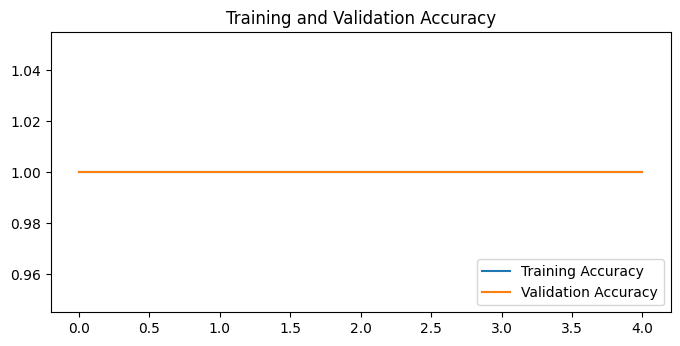

In [90]:
# Создаем график точности
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Вывод: Данный график отображает изменение точности модели при обучении и валидации во время каждого эпоха обучения. Данный график имеет значение 1, что указывает, что модель достигает идеальной точности как на обучающем, так и на валидационном наборах данных.

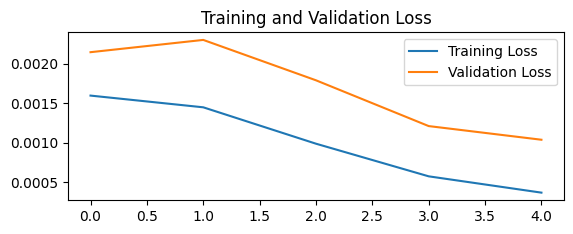

In [91]:
# Создаем график потерь
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Вывод: Training Loss и Validation Loss постепенно уменьшаются, что указывает на то, что модель "учится" и становится способной к лучшему прогнозированию

In [83]:
# Сохранение модели после повторного обучения
model.save('model_retrained.h5')

### Вывод:
В данной работе была построена модель бинарного классификатора, а также было проведено повторное обучение на новом наборе. Результаты обучения примерно одинаковы, поэтому было решено сохранить обе модели